# Non-uniform section

In [1]:
import pandas as pd
import scipy as sp
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
db = pd.read_excel('exp2.xlsx')
db.head()

,Tempo (min),0 - Temperatura (°C),5 - Temperatura (°C),10 - Temperatura (°C),15 - Temperatura (°C),20 - Temperatura (°C)
0,0,20.0,20.0,20.0,20.0,20.0
1,1,49.5,31.2,24.8,22.8,22.1
2,2,65.5,40.8,27.7,24.1,23.0
3,3,67.5,48.6,32.4,26.1,23.6
4,4,70.5,53.6,36.8,28.8,24.1


In [3]:
timeexp = np.array(db['Tempo (min)'])
tempexp0 = np.array(db['0 - Temperatura (°C)'])
tempexp5 = np.array(db['5 - Temperatura (°C)'])
tempexp10 = np.array(db['10 - Temperatura (°C)'])
tempexp15 = np.array(db['15 - Temperatura (°C)'])
tempexp20 = np.array(db['20 - Temperatura (°C)'])

MSE: 14.028543942481672
Equação do modelo ajustado: y = 31.37 + 13.4366 * x^1 + -1.0142 * x^2 + 0.0373 * x^3 + -0.0005 * x^4 


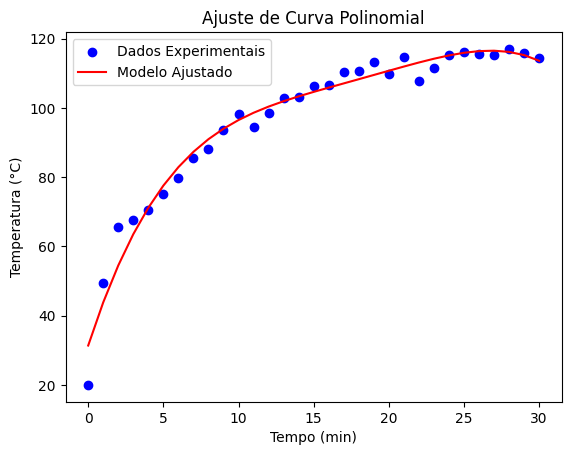

In [4]:
# Dados experimentais
x = timeexp  # insira seus dados aqui
y = tempexp0  # insira seus dados aqui

# Transformação polinomial
degree = 4  # ajuste o grau conforme necessário
poly = PolynomialFeatures(degree=degree)
x_poly = poly.fit_transform(x.reshape(-1, 1))

# Modelo de regressão
model = LinearRegression()
model.fit(x_poly, y)

# Previsões
y_pred = model.predict(x_poly)

# Avaliação
mse = mean_squared_error(y, y_pred)
print(f'MSE: {mse}')

# Exibir a equação do modelo
intercepto = model.intercept_
coeficientes = model.coef_

# Construir a equação
equacao = f"y = {intercepto:.2f} "
for i in range(1, len(coeficientes)):
    equacao += f"+ {coeficientes[i]:.4f} * x^{i} "
print("Equação do modelo ajustado:", equacao)

# Visualização
plt.scatter(x, y, color='blue', label='Dados Experimentais')
plt.plot(x, y_pred, color='red', label='Modelo Ajustado')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.title('Ajuste de Curva Polinomial')
plt.show()


In [76]:
#data
T0hip = 20.
T0 = [T0hip+273.15] #K
Tamb =293.0
#physical properties:
esp_weight = 7.850 # kg/m3
K = 43 #W/m·K
#50
h = 10.81 #W/m².K
cp = 486 #J/kg·K
alfa = K/(esp_weight*cp)
#geometric properties:
t0 = 0.02 #m
tl = 0.01 #m
L = 0.2 #m
thick = 0.00477 #m
P0 = 2*(2*t0 + thick)
Pl = 2*(2*tl + thick)
A0 = 2*t0*thick
Al = 2*tl*thick

#time properties:
time = 30 #min

#iteration
it_time = 301 #time 
it_space = 201 #space

l_vector = np.linspace(0,L,it_space)
t_vector = np.linspace(0,time,it_time)
dx = L/(it_space-1)


#Area and Perimeter
area_coef = (Al-A0)/L
peri_coef = (Pl-P0)/L
Area = area_coef*l_vector[1:-1] + A0
Perimeter = peri_coef*l_vector[1:-1] + P0

#t = 0, T = 20°C p/ 0<=x<=l
initial_condition = np.concatenate([T0,294*np.ones(it_space-1)])

In [77]:
initial_condition

array([293.15, 294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  ,
       294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  ,
       294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  ,
       294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  ,
       294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  ,
       294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  ,
       294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  ,
       294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  ,
       294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  ,
       294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  ,
       294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  ,
       294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  ,
       294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  ,
       294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  , 294.  ,
      

In [78]:
def result(h,Tamb,esp_weight,cp,A0,area_coef,peri_coef):
    #Temperature = initial_condition
    #d2T_dx2 = np.zeros(len(Temperature))
    
    def dTdx(Temperature,dx):
        dT_dx = (Temperature[2:] - Temperature[:-2]) / (2 * dx)
        return dT_dx
    
    def d2Tdx2(Temperature,dx):
     #Temperature vector minus 2 elements = eq1 vector
        d2T_dx2 = (Temperature[2:] + Temperature[:-2] - 2*Temperature[1:-1])/(dx**2)
        return d2T_dx2

    def dTdt(Temperature,t_vector):
        Temperature[0] = (31.37 + 13.4366*(t_vector)**1 -1.0142*(t_vector)**2 + 0.0373*(t_vector)**3 -0.0005*(t_vector)**4)+273
        dT_dt = np.zeros(len(Temperature))
        dT_dt[1:-1] = (K*(area_coef*dTdx(Temperature,dx)+(Area)*d2Tdx2(Temperature,dx))-h*(Perimeter)*(Temperature[1:-1]-Tamb))/((Area)*esp_weight*cp)
        #dT_dt[1:-1] =(K*(area_coef*dTdx(Temperature,dx)+(((area_coef*l_vector[1:-1]+A0)*d2Tdx2(Temperature,dx))-h*((peri_coef)*l_vector[1:-1]+P0)*(Temperature[1:-1]-Tamb))))/(((area_coef*l_vector[1:-1]+A0)*esp_weight*cp))
        dT_dt[-1] = dT_dt[-2]
        return (dT_dt)
    
    solution = odeint(dTdt,initial_condition, t_vector)

    return solution


In [79]:
function = result(h,Tamb,esp_weight,cp,A0,area_coef,peri_coef)

In [80]:
function

array([[293.15      , 294.        , 294.        , ..., 294.        ,
        294.        , 294.        ],
       [304.37      , 305.47171065, 305.24197935, ..., 293.86658198,
        293.86657305, 293.86657305],
       [304.37      , 306.80655196, 306.59831996, ..., 293.82050228,
        293.82034684, 293.82034684],
       ...,
       [304.37      , 395.94214472, 394.97898918, ..., 319.59855304,
        319.59509565, 319.59509565],
       [304.37      , 395.88300623, 394.92068337, ..., 319.5948896 ,
        319.59143404, 319.59143404],
       [304.37      , 395.81693055, 394.85551093, ..., 319.58967442,
        319.58622093, 319.58622093]])

In [81]:
Temp_0 = function[:,0] - 273
Temp_5 = function[:,50] - 273 
Temp_10  = function[:,100] - 273
Temp_15  = function[:,150] - 273
Temp_20  = function[:,200] - 273

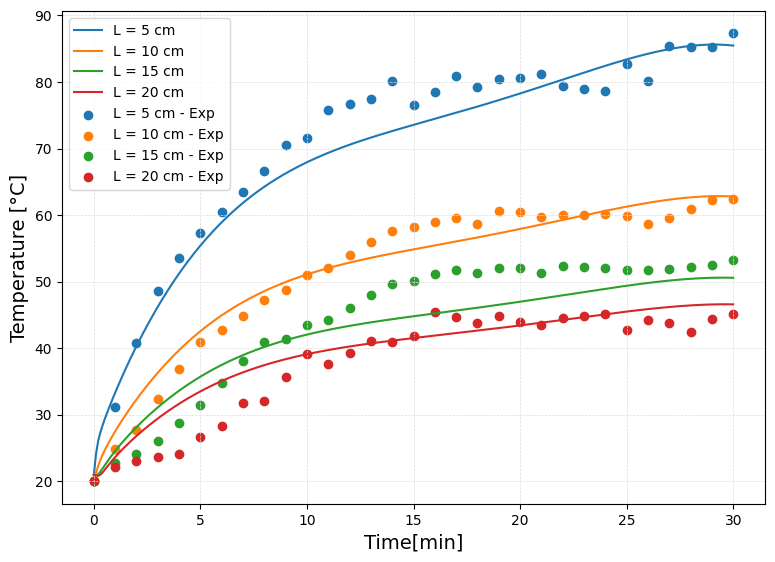

In [82]:
fig,ax = plt.subplots()
fig.set_size_inches(8., 6., forward=True)
fig.tight_layout(rect=[0.03, 0.03, 1., 0.95])
#plt.plot (t_vector, Temp_0, label='L = 0 cm')
plt.plot (t_vector, Temp_5, label='L = 5 cm')
plt.plot (t_vector, Temp_10 , label='L = 10 cm')
plt.plot (t_vector, Temp_15 , label='L = 15 cm')
plt.plot (t_vector, Temp_20 , label='L = 20 cm')
plt.scatter (timeexp, tempexp5 , label='L = 5 cm - Exp')
plt.scatter (timeexp, tempexp10 , label='L = 10 cm - Exp')
plt.scatter (timeexp, tempexp15, label='L = 15 cm - Exp')
plt.scatter (timeexp, tempexp20 , label='L = 20 cm - Exp')
plt.xlabel('Time[min]', fontsize = 14)
plt.ylabel(u'Temperature [°C]', fontsize = 14)
plt.grid(color='gainsboro', linestyle='--', linewidth=0.5)
#ax.set_xlim(0,tempo)
#ax.set_ylim(0,1.1*Ca0)
ax.legend(loc = 2)